- Takes in unlabeled data, and then attempts to find similarities between the different groups of data to segment the datat into clusters
- You do not know if the data is being labelled correctly since there are no corresponding y values in the data set
- something that is can be done is to apply an unsupervised algorithim to a data set, get the labels from the data set, and then run a supervised learning to the data with the newly created labels
- Questions that we need to answer:
    - How many sets of clustering are correct
    - How do we know if the clustering is correct? (can't really)
    


### K means clustering
- Each point must belong to a cluster, and each point must belong to one cluster
- Steps: 
    - Pick a K value (number of groups)
    - Randomly select K distinict data points, we will treat these data points as "our" cluster points
    - Assign the remaining points to closet K distinct points (distance metric)
    - Calculate the centre of each cluster, based on mean value of cluster
    - then begin the label each of the surrounding points to a cluster depending on which cluster center is the closest
    - repeat the previous two steps until there are no more cluster reassignments. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/bank-full.csv")

In [3]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  subscribed  
0          93.994          -36.4      4.857       5191.0          no  
1          93.994          -36.4      4.857       5191.0          no  
2          93.994          -36.4      4.857       5191.0          no  
3          93.994          -36.4      4.857       5191.0          no  
4          93.994          -36.4      4.857       5191.0          no  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe().transpose()

count         mean         std       min       25%  \
age             41188.0    40.024060   10.421250    17.000    32.000   
duration        41188.0   258.285010  259.279249     0.000   102.000   
campaign        41188.0     2.567593    2.770014     1.000     1.000   
pdays           41188.0   962.475454  186.910907     0.000   999.000   
previous        41188.0     0.172963    0.494901     0.000     0.000   
emp.var.rate    41188.0     0.081886    1.570960    -3.400    -1.800   
cons.price.idx  41188.0    93.575664    0.578840    92.201    93.075   
cons.conf.idx   41188.0   -40.502600    4.628198   -50.800   -42.700   
euribor3m       41188.0     3.621291    1.734447     0.634     1.344   
nr.employed     41188.0  5167.035911   72.251528  4963.600  5099.100   

                     50%       75%       max  
age               38.000    47.000    98.000  
duration         180.000   319.000  4918.000  
campaign           2.000     3.000    56.000  
pdays            999.000   999.000   999.000  
previous           0.000     0.000     7.000  
emp.var.rate       1.100     1.400     1.400  
cons.price.idx    93.749    93.994    94.767  
cons.conf.idx    -41.800   -36.400   -26.900  
euribor3m          4.857     4.961     5.045  
nr.employed     5191.000  5228.100  5228.100

<AxesSubplot:xlabel='age', ylabel='Count'>

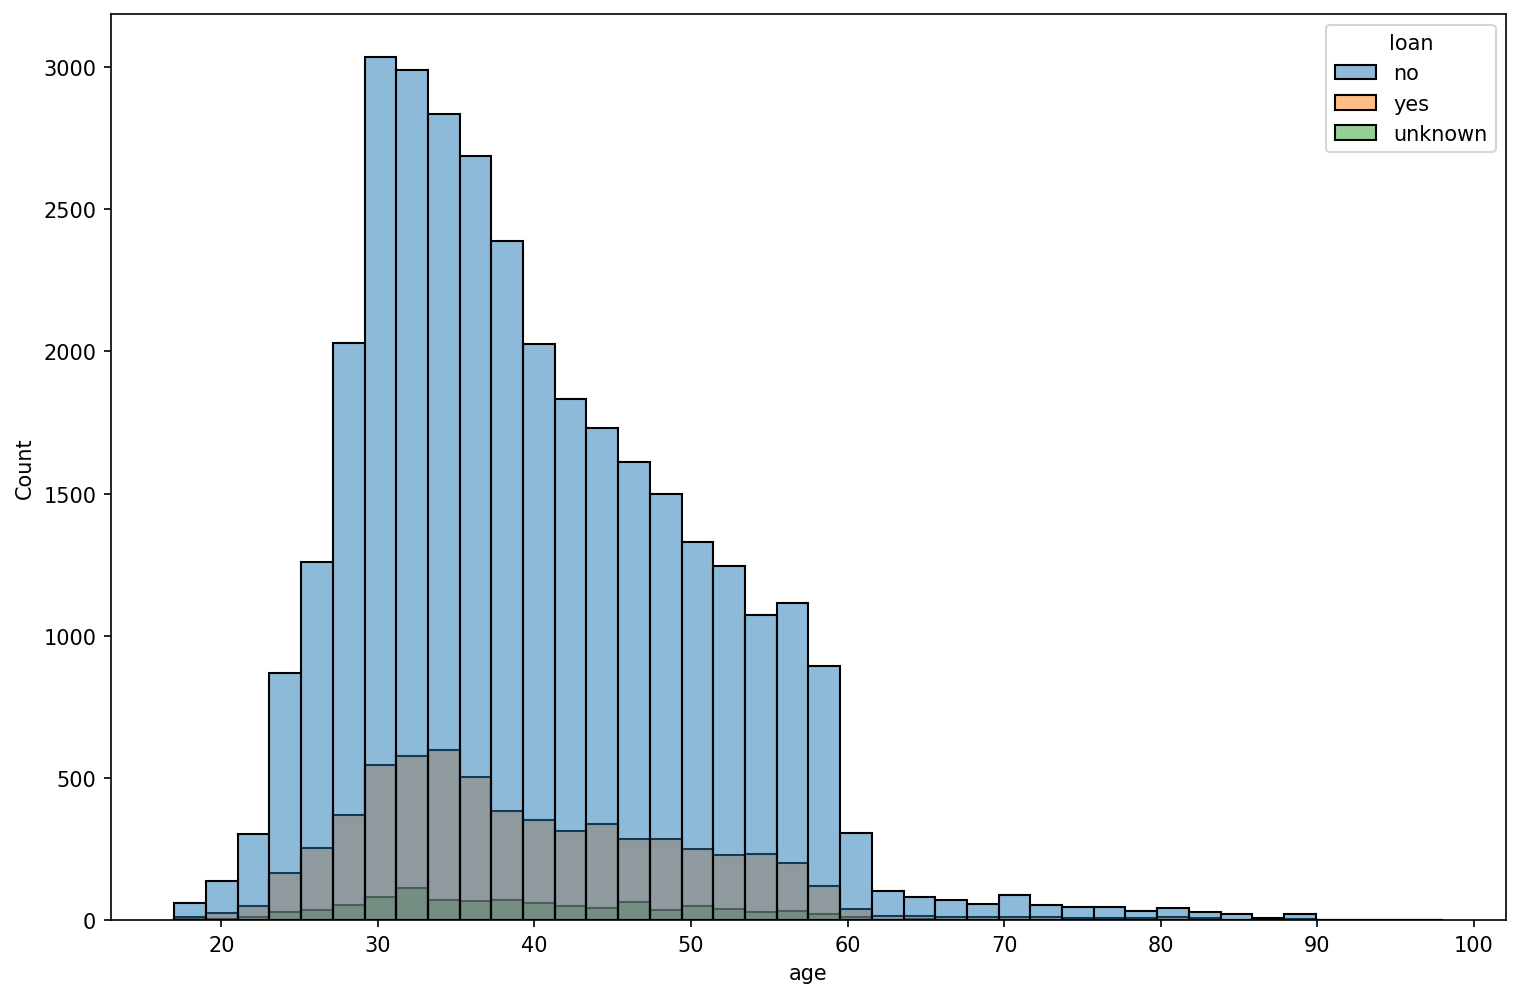

In [10]:
plt.figure(figsize=(12,8), dpi=150)
sns.histplot(data=df, x="age", bins=40, hue="loan")

<AxesSubplot:xlabel='pdays', ylabel='Count'>

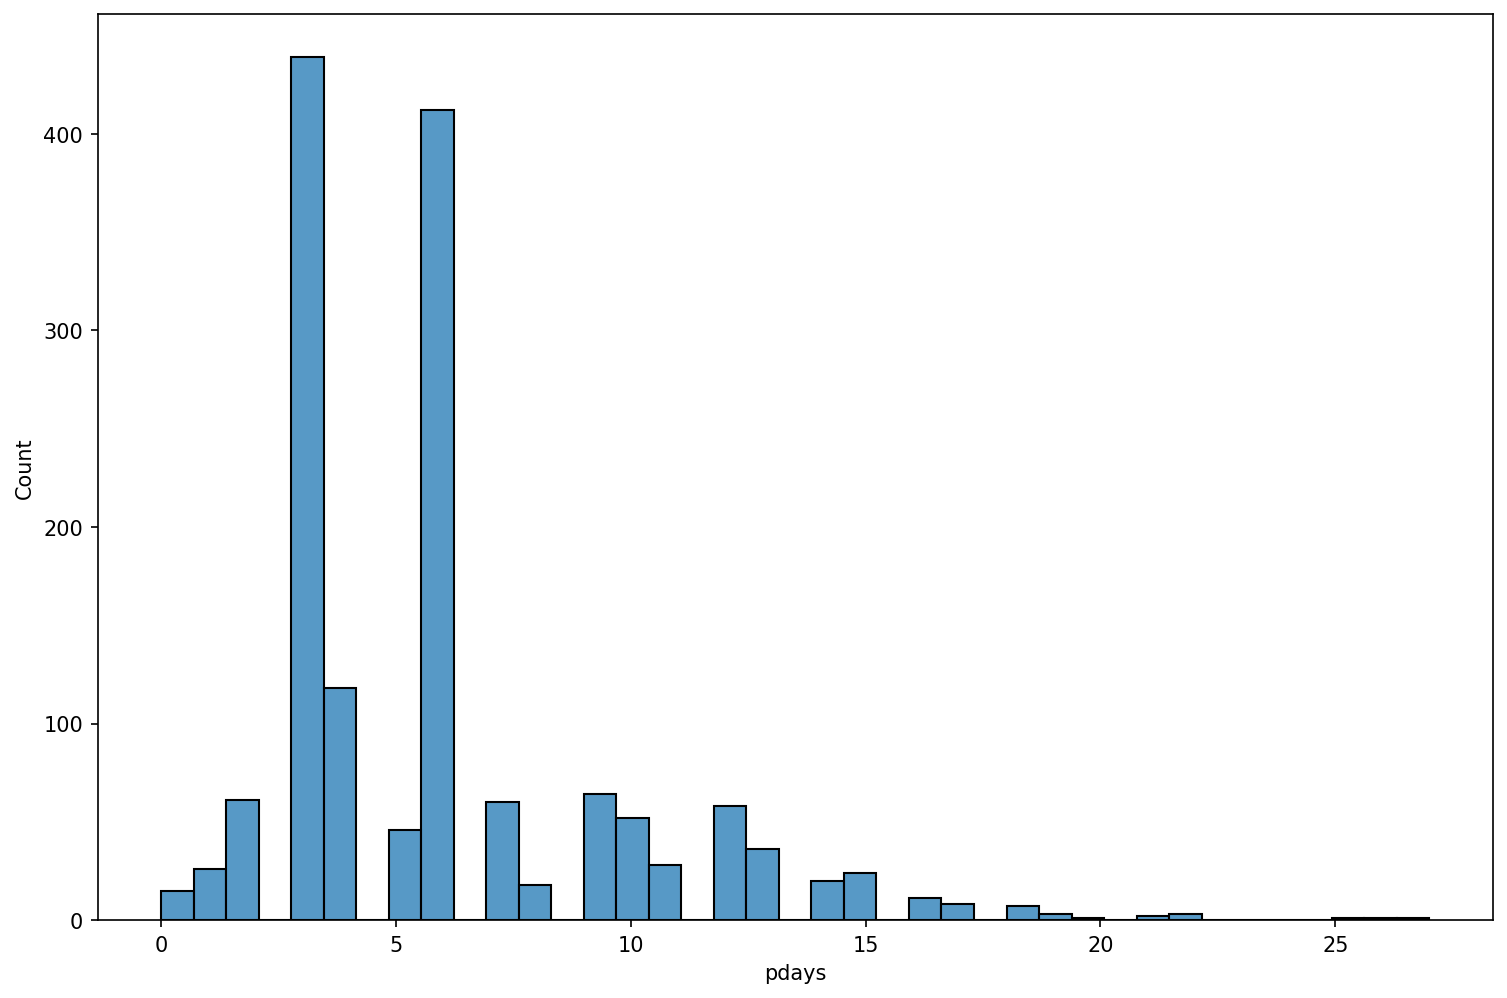

In [13]:
plt.figure(figsize=(12,8), dpi=150)
sns.histplot(data=df[df["pdays"]!=999], x="pdays")

In [17]:
df["duration"]

array([ 261,  149,  226, ..., 1246, 1556, 1868])

(0.0, 1000.0)

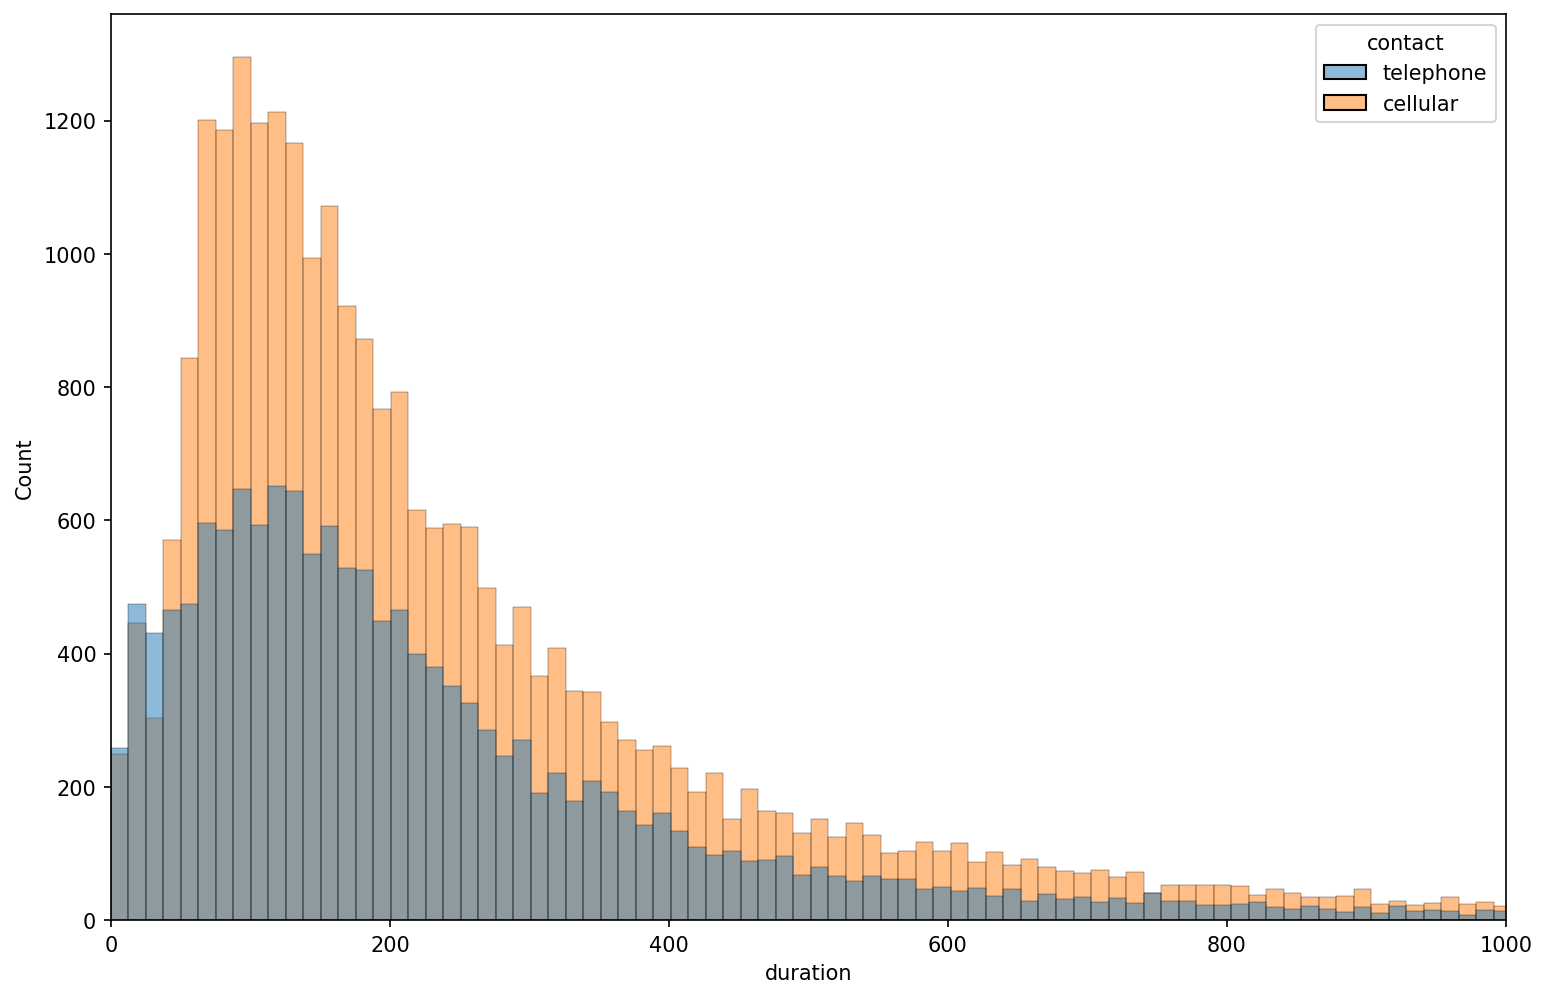

In [20]:
plt.figure(figsize=(12,8), dpi=150)
sns.histplot(data=df, x="duration", hue="contact")
plt.xlim(0,1000)

<AxesSubplot:xlabel='contact', ylabel='count'>

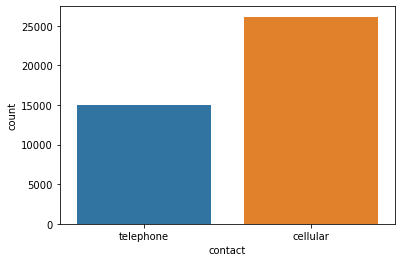

In [21]:
sns.countplot(data=df, x="contact")

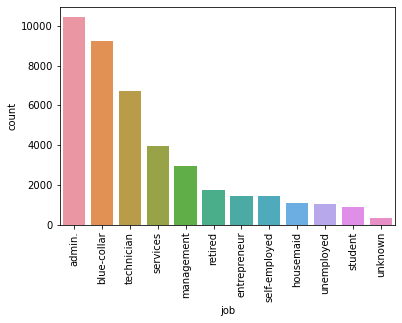

In [29]:
sns.countplot(data=df, x="job", order=df["job"].value_counts().index)
plt.xticks(rotation=90);

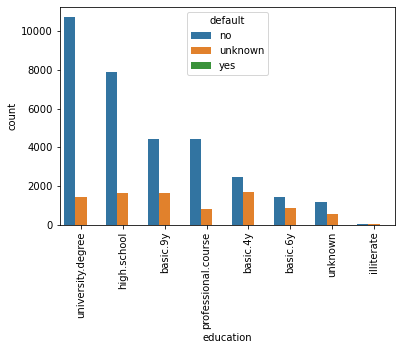

In [31]:
sns.countplot(data=df, x="education", order=df["education"].value_counts().index, hue="default")
plt.xticks(rotation=90);

In [34]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  subscribed  
0          93.994          -36.4      4.857       5191.0          no  
1          93.994          -36.4      4.857       5191.0          no  
2          93.994          -36.4      4.857       5191.0          no  
3          93.994          -36.4      4.857       5191.0          no  
4          93.994          -36.4      4.857       5191.0          no  

[5 rows x 21 columns]

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [36]:
X = pd.get_dummies(df)

In [37]:
X

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0       56       261         1    999         0           1.1          93.994   
1       57       149         1    999         0           1.1          93.994   
2       37       226         1    999         0           1.1          93.994   
3       40       151         1    999         0           1.1          93.994   
4       56       307         1    999         0           1.1          93.994   
...    ...       ...       ...    ...       ...           ...             ...   
41183   73       334         1    999         0          -1.1          94.767   
41184   46       383         1    999         0          -1.1          94.767   
41185   56       189         2    999         0          -1.1          94.767   
41186   44       442         1    999         0          -1.1          94.767   
41187   74       239         3    999         1          -1.1          94.767   

       cons.conf.idx  euribor3m  nr.employed  ...  day_of_week_fri  \
0              -36.4      4.857       5191.0  ...                0   
1              -36.4      4.857       5191.0  ...                0   
2              -36.4      4.857       5191.0  ...                0   
3              -36.4      4.857       5191.0  ...                0   
4              -36.4      4.857       5191.0  ...                0   
...              ...        ...          ...  ...              ...   
41183          -50.8      1.028       4963.6  ...                1   
41184          -50.8      1.028       4963.6  ...                1   
41185          -50.8      1.028       4963.6  ...                1   
41186          -50.8      1.028       4963.6  ...                1   
41187          -50.8      1.028       4963.6  ...                1   

       day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  \
0                    1                0                0                0   
1                    1                0                0                0   
2                    1                0                0                0   
3                    1                0                0                0   
4                    1                0                0                0   
...                ...              ...              ...              ...   
41183                0                0                0                0   
41184                0                0                0                0   
41185                0                0                0                0   
41186                0                0                0                0   
41187                0                0                0                0   

       poutcome_failure  poutcome_nonexistent  poutcome_success  \
0                     0                     1                 0   
1                     0                     1                 0   
2                     0                     1                 0   
3                     0                     1                 0   
4                     0                     1                 0   
...                 ...                   ...               ...   
41183                 0                     1                 0   
41184                 0                     1                 0   
41185                 0                     1                 0   
41186                 0                     1                 0   
41187                 1                     0                 0   

       subscribed_no  subscribed_yes  
0                  1               0  
1                  1               0  
2                  1               0  
3                  1               0  
4                  1               0  
...              ...             ...  
41183              0               1  
41184              1               0  
41185              1               0  
41186              0               1  
41187              1              

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

In [45]:
scaled_X = scaler.fit_transform(X)

In [41]:
from sklearn.cluster import KMeans

In [42]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random', ndarray, callable}, default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` observations (rows) at random from data
 |      for 

In [46]:
model = KMeans(n_clusters=2)

In [54]:
cluster_labels = model.fit_predict(scaled_X)
cluster_labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [56]:
X["cluster"] = cluster_labels

<AxesSubplot:>

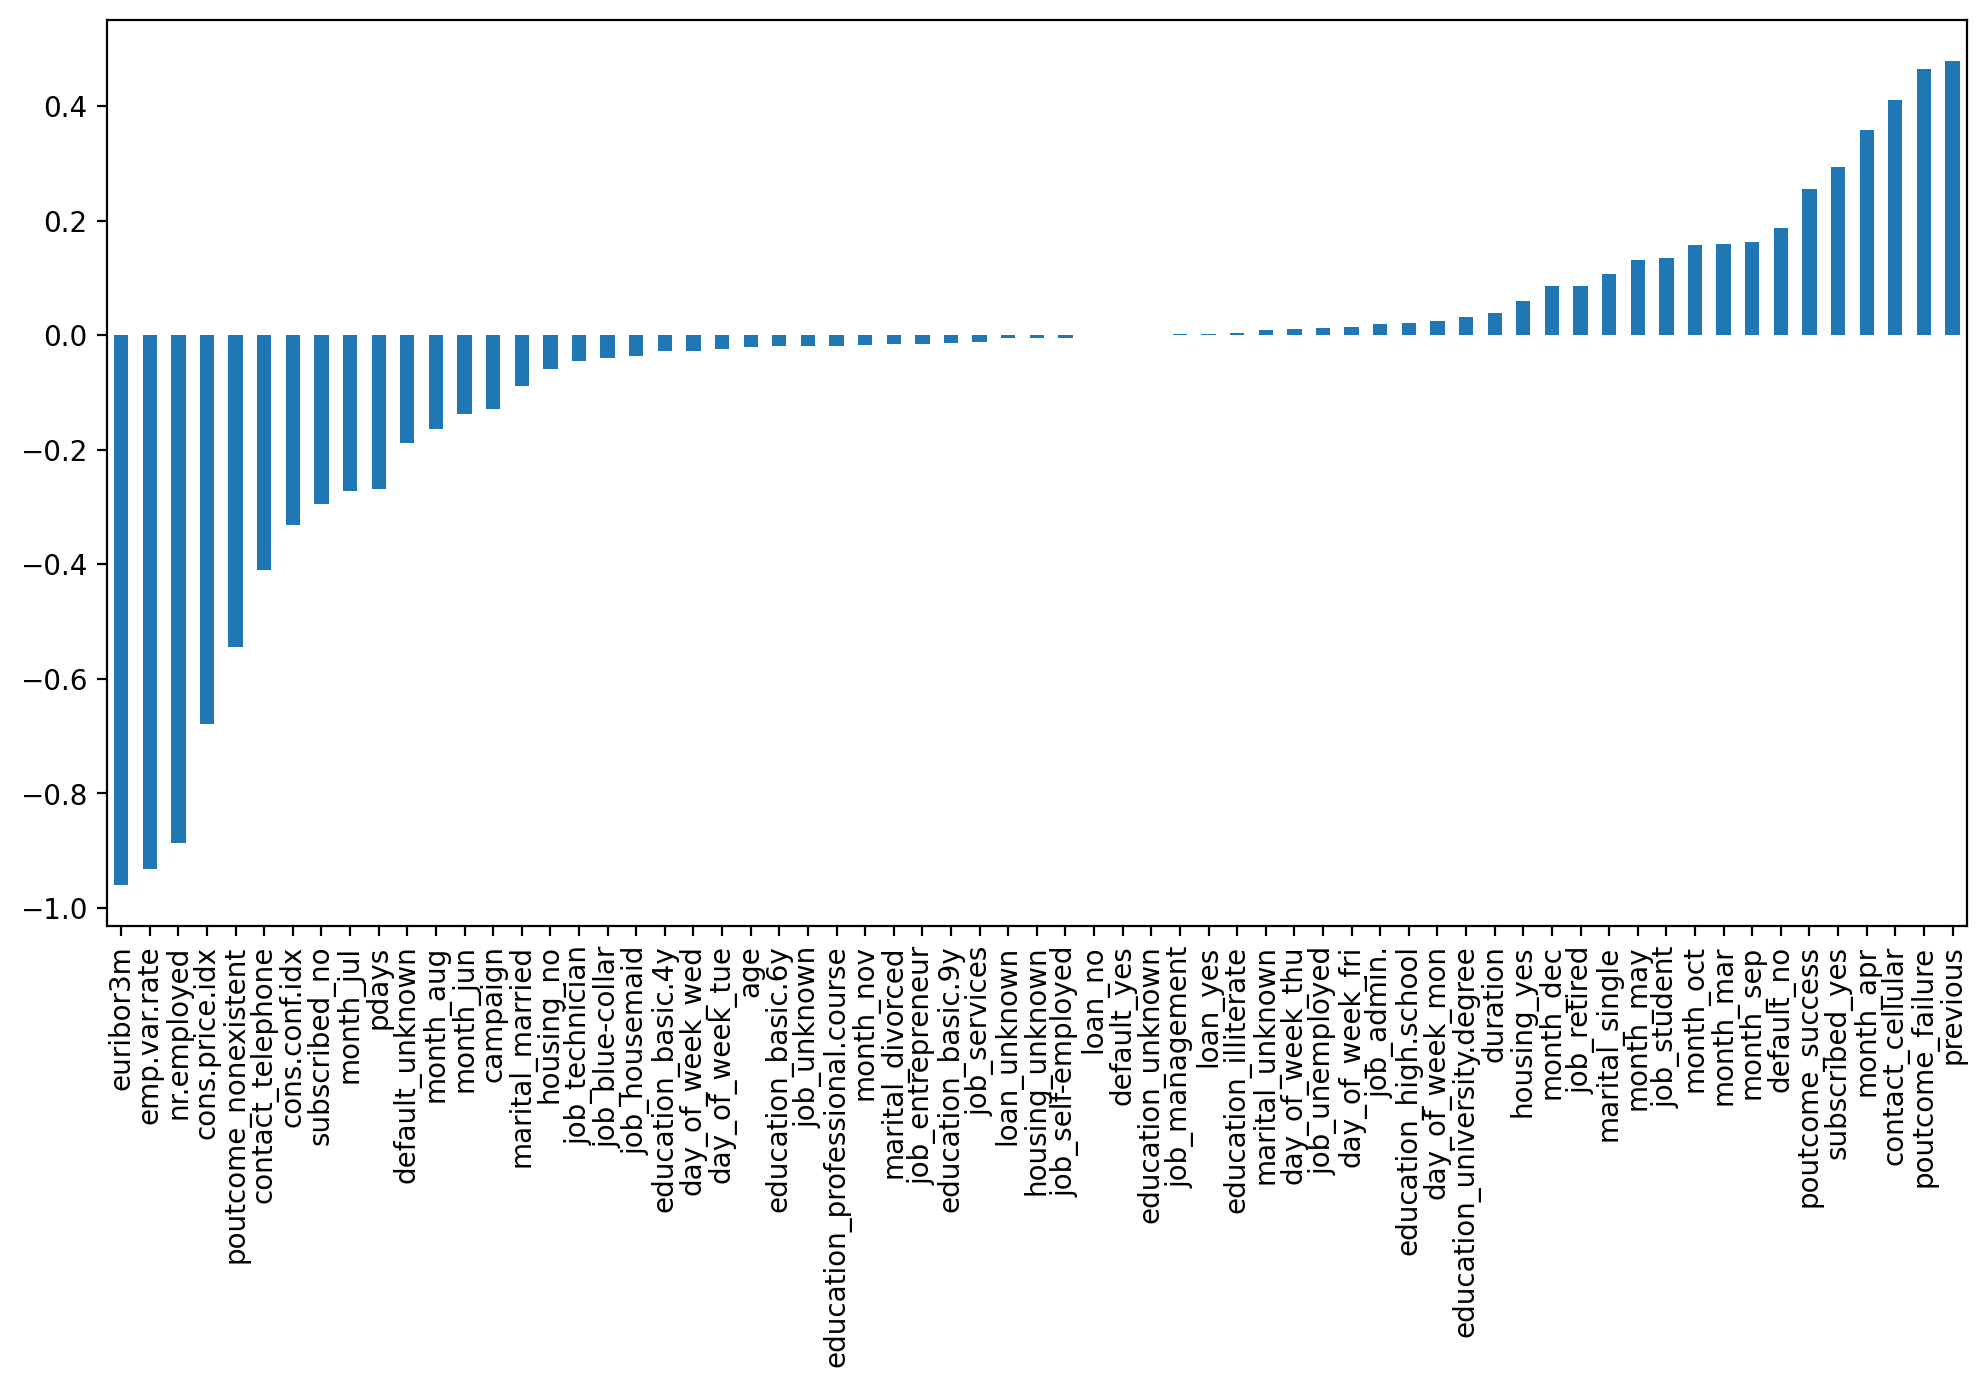

In [65]:
plt.figure(figsize=(12,6),dpi=200)
X.corr()["cluster"][:-1].sort_values().plot(kind="bar")

In [66]:
ssd = []
for k in range(2, 10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    
    ssd.append(model.inertia_)

    

In [67]:
ssd

[2469792.533627056,
 2370416.848011374,
 2271502.8270116174,
 2200694.231194285,
 2157695.3950839643,
 2105688.031206704,
 2029766.166097871,
 2001706.8384764763]

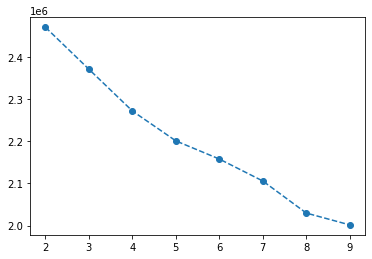

In [69]:
plt.plot(range(2,10), ssd, "o--")

In [72]:
temp = pd.Series(ssd)

In [73]:
temp.diff()

0             NaN
1   -99375.685616
2   -98914.021000
3   -70808.595817
4   -42998.836110
5   -52007.363877
6   -75921.865109
7   -28059.327621
dtype: float64